In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("LabourTrainingEvaluationData.csv")

In [4]:
df.shape

(15992, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [7]:
df.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [8]:
df.duplicated().sum()

2002

In [9]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df["Eduacation"].value_counts()

Eduacation
HighSchool            5348
LessThanHighSchool    4413
Intermediate          2333
graduate              1151
PostGraduate           745
Name: count, dtype: int64

In [13]:
df["Race"].value_counts()

Race
NotBlack    12841
black        1149
Name: count, dtype: int64

In [14]:
df["Hisp"].value_counts()

Hisp
NotHispanic    12851
hispanic        1139
Name: count, dtype: int64

In [15]:
df["Eduacation"]=pd.Categorical(df["Eduacation"],ordered=True,categories=["LessThanHighSchool","HighSchool","Intermediate","graduate","PostGraduate"]).codes
df["Eduacation"].value_counts()

Eduacation
1    5348
0    4413
2    2333
3    1151
4     745
Name: count, dtype: int64

In [16]:
dummy=pd.get_dummies(df[['Race','Hisp',"MaritalStatus"]],dtype='int')
df = pd.concat([df, dummy], axis=1)
df.drop(['Race','Hisp',"MaritalStatus"], axis=1, inplace=True)
df.head()

,Age,Eduacation,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
0,45,0,1,21516.670,25243.550,25564.670,1,0,1,0,1,0
1,21,2,0,3175.971,5852.565,13496.080,1,0,1,0,0,1
2,38,1,0,23039.020,25130.760,25564.670,1,0,1,0,1,0
3,48,0,1,24994.370,25243.550,25564.670,1,0,1,0,1,0
4,18,0,1,1669.295,10727.610,9860.869,1,0,1,0,1,0


In [17]:
df.columns

Index(['Age', 'Eduacation', 'Nodeg', 'Earnings_1974', 'Earnings_1975',
       'Earnings_1978', 'Race_NotBlack', 'Race_black', 'Hisp_NotHispanic',
       'Hisp_hispanic', 'MaritalStatus_Married', 'MaritalStatus_NotMarried'],
      dtype='object')

In [18]:
x=df[['Age', 'Eduacation', 'Nodeg', 'Earnings_1974', 'Earnings_1975',
       'Race_NotBlack', 'Race_black', 'Hisp_NotHispanic',
       'Hisp_hispanic', 'MaritalStatus_Married', 'MaritalStatus_NotMarried']]
y=df[['Earnings_1978']]

In [19]:
cat=df.select_dtypes(include=["object"])
num=df.select_dtypes(include=["int64","float64"])

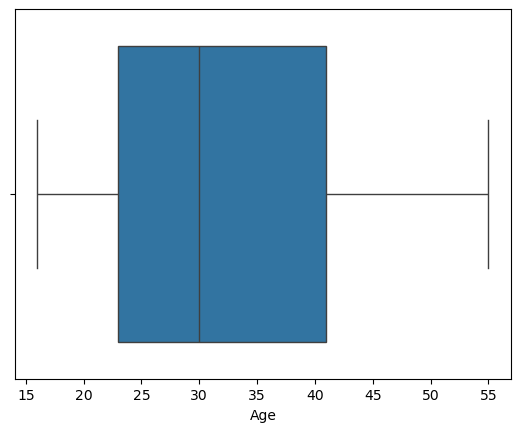

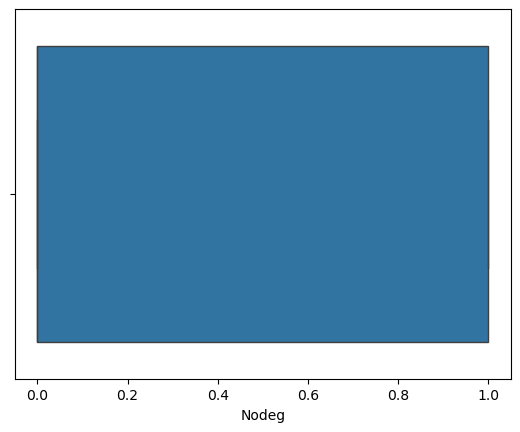

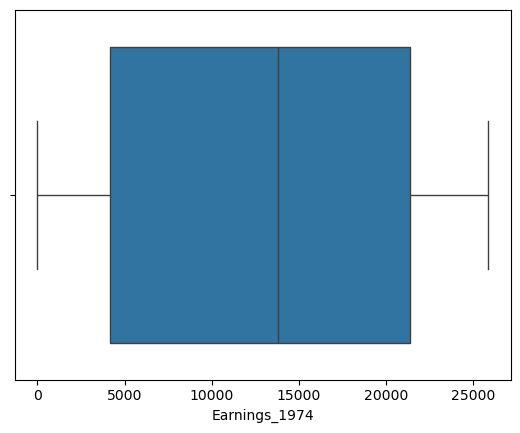

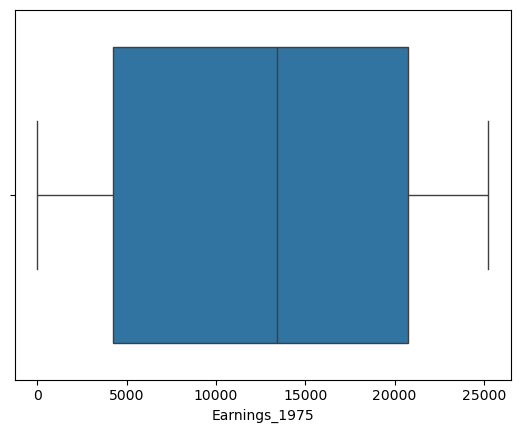

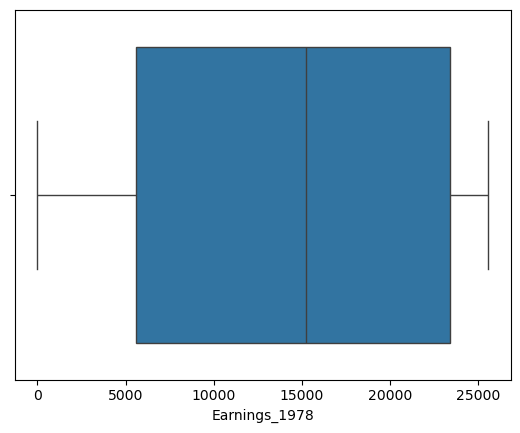

In [20]:
for i in num.columns:
    sns.boxplot(data=num,x=i)
    plt.show()

### ASSUMPTION 1, Linearity

1. Linearity

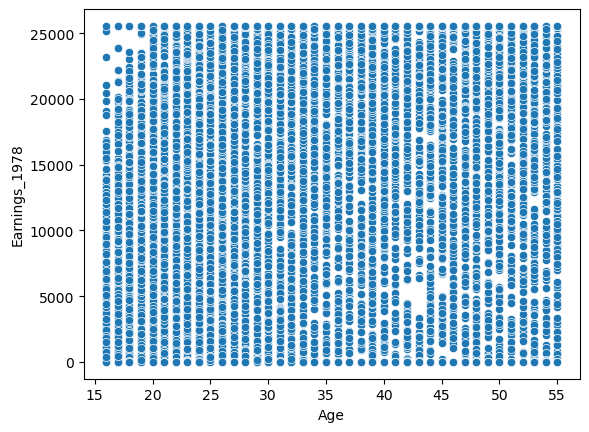

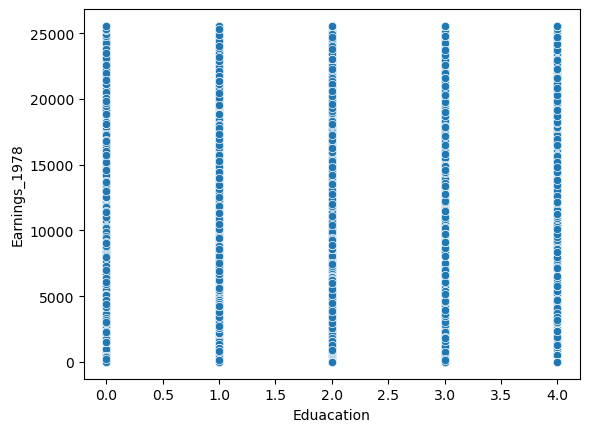

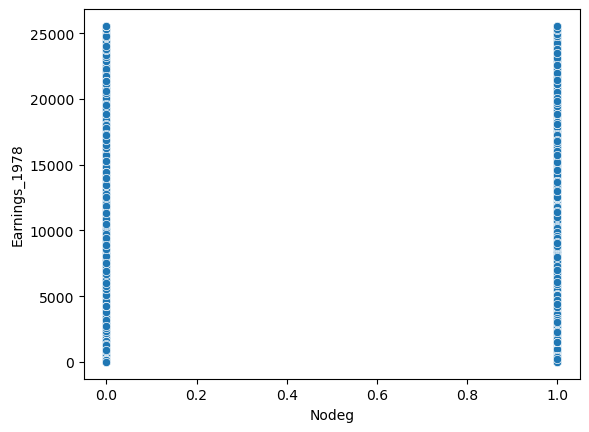

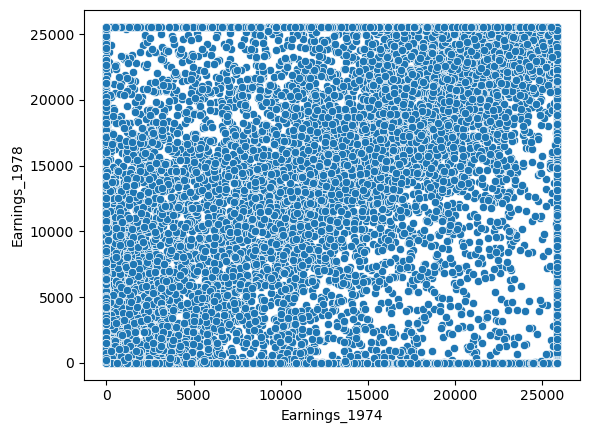

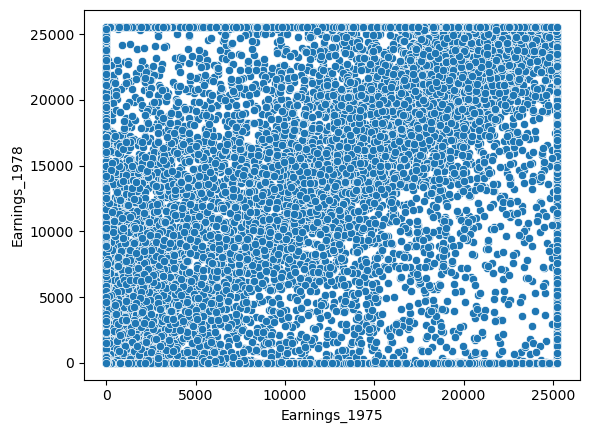

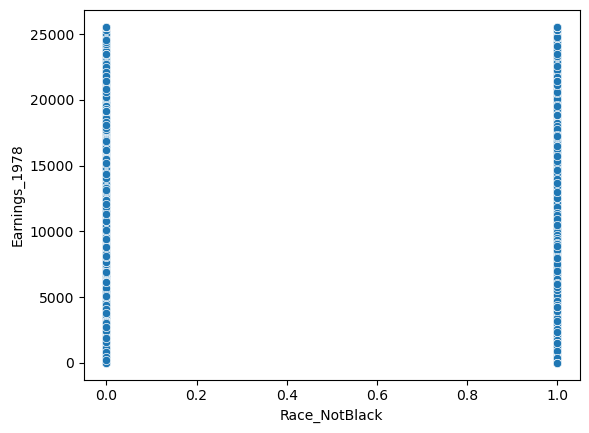

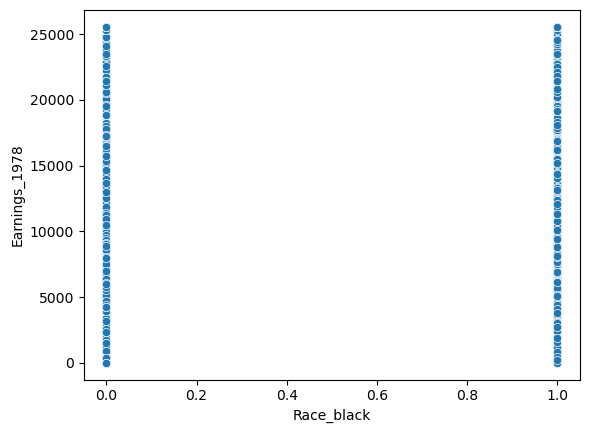

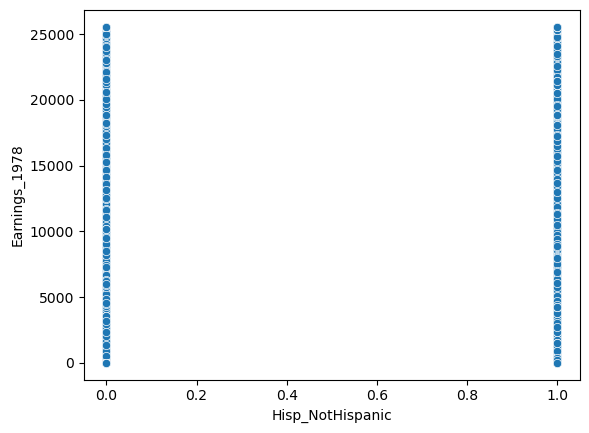

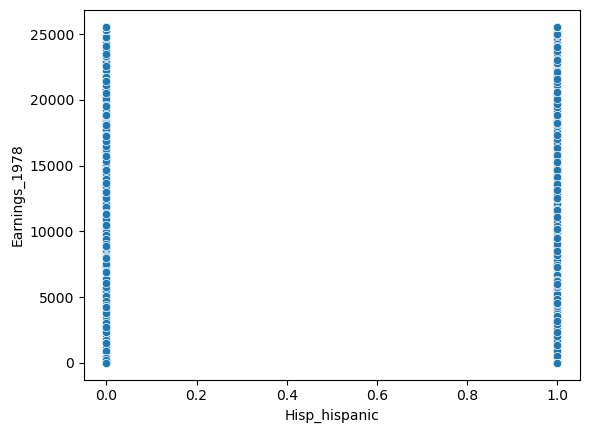

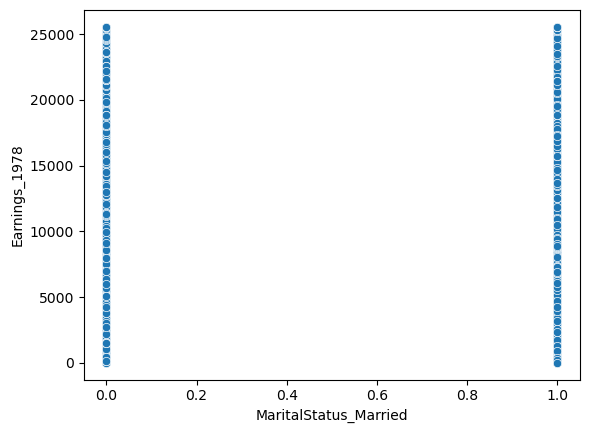

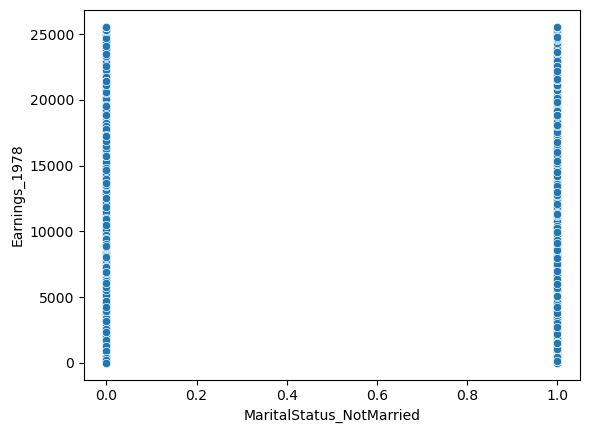

In [21]:
for i in x.columns:
    if x[i].dtype!="object":
        sns.scatterplot(x=x[i],y=y['Earnings_1978'])
        plt.show()

<Axes: >

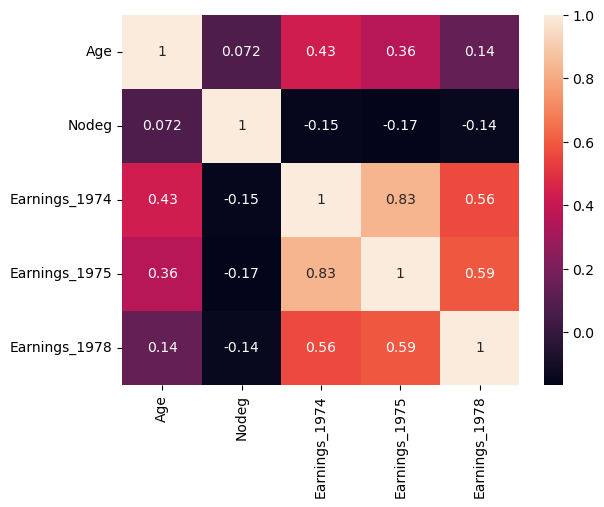

In [22]:
sns.heatmap(num.corr(),annot=True)

Shows us that there is no linear relationship between the predictor and target variables

### ASSUMPTION 2, Multicolliearity

In [23]:
import statsmodels.api as sm
x_const=sm.add_constant(x)

In [24]:
model=sm.OLS(y,x_const).fit()

In [25]:
model_summary=model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     1079.
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:04:11   Log-Likelihood:            -1.4428e+05
No. Observations:               13990   AIC:                         2.886e+05
Df Residuals:                   13981   BIC:                         2.886e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3015.2591    114.032     26.442      0.000    2791.741    3238.777
Age                       -105.1965      6.594    -15.954      0.000    -118.121     -92.272
Eduacation                 336.7839     78.407      4.295      0.000     183.096     490.472
Nodeg                      136.4890    192.555      0.709      0.478    -240.944     513.922
Earnings_1974                0.2635      0.013     20.452      0.000       0.238       0.289
Earnings_1975                0.4381      0.013     34.059      0.000       0.413       0.463
Race_NotBlack             1943.1849    107.161     18.133      0.000    1733.134    2153.236
Race_black                1072.0742    144.205      7.434      0.000     789.413    1354.735
Hisp_NotHispanic          1658.0706    106.953     15.503      0.000    1448.429    1867.712
Hisp_hispanic             1357.1885    146.068      9.291      0.000    1070.875    1643.502
MaritalStatus_Married     1648.4457    105.557     15.617      0.000    1441.540    1855.351
MaritalStatus_NotMarried  1366.8134     84.474     16.180      0.000    1201.234    1532.393
==============================================================================
Omnibus:                      827.106   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.714
Skew:                          -0.565   Prob(JB):                    2.32e-232
Kurtosis:                       3.743   Cond. No.                     4.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [27]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]

D:\Anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
D:\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [28]:
vif_data, model_summary.tables[1]

(                     Feature       VIF
 0                      const  0.000000
 1                        Age  1.384932
 2                 Eduacation  2.037659
 3                      Nodeg  2.106615
 4              Earnings_1974  3.583844
 5              Earnings_1975  3.336094
 6              Race_NotBlack       inf
 7                 Race_black       inf
 8           Hisp_NotHispanic       inf
 9              Hisp_hispanic       inf
 10     MaritalStatus_Married       inf
 11  MaritalStatus_NotMarried       inf,
 <class 'statsmodels.iolib.table.SimpleTable'>)

Model is not Multicollinear, as there is no VIF which is greater than 5

### ASSUMPTION 3, Homoscedasticity

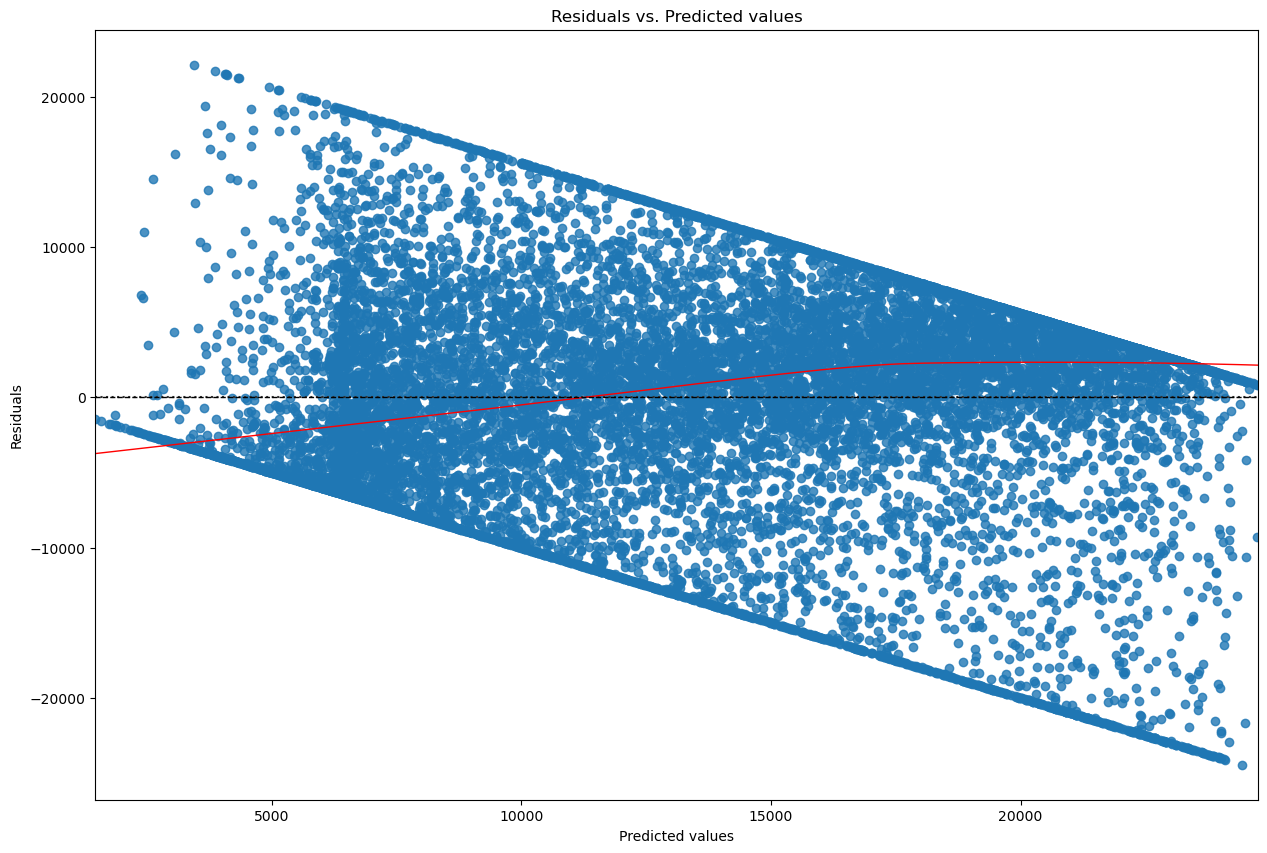

In [29]:
model = sm.OLS(y,x).fit()

predicted = model.predict(x)
residuals = model.resid
plt.figure(figsize=(15,10))
sns.residplot(x=predicted, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted values")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

The residuals appear to fan out slightly as the predicted values increase.

This indicates a mild violation of homoscedasticity (called heteroscedasticity). The variance of residuals is not perfectly constant — errors for higher earnings are more spread out.

## Assumption 4, Independence of Errors

In [30]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
dw_stat


1.9716075930562933

There is no significant autocorrelation in the residuals. The assumption of independence of errors is satisfied.

## Assumption 5, Normality of Residuals

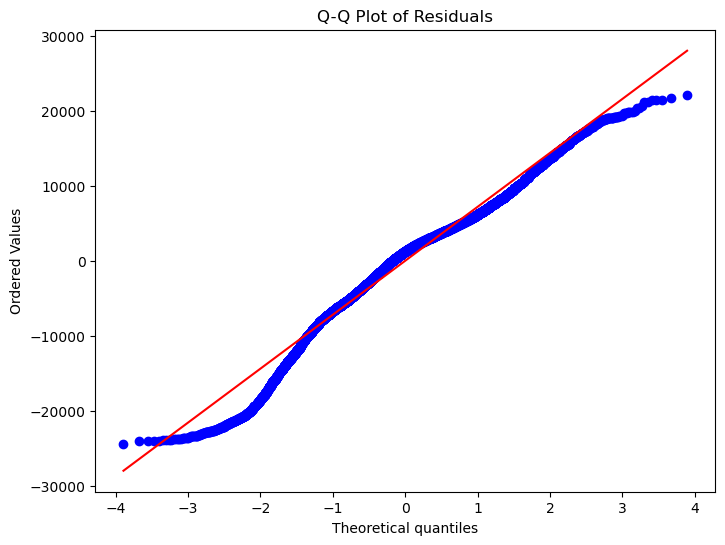

D:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13990.
  res = hypotest_fun_out(*samples, **kwds)


(0.9739985067599722, 2.828432761552578e-44)

In [31]:
import scipy.stats as stats



plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


shapiro_test = stats.shapiro(residuals)
shapiro_test_stat, shapiro_p_value = shapiro_test
shapiro_test_stat, shapiro_p_value


There may be skewness or heavy tails — a sign of non-normality, since points are curving away especially at the end

p-value > 0.05: Fail to reject H₀ → residuals are normally distributed